In [1]:
import json
import os
import numpy as np

train_task_list = [line.strip() for line in open("../natural-instructions/splits/default_dev/train_tasks.txt", "r").readlines()]
test_task_list = [line.strip() for line in open("../natural-instructions/splits/default_dev/test_tasks.txt", "r").readlines()]
# Load LabelSpace information from task_metadata.json
meta_data_file = "task_metadata.json"
meta_data = json.load(open(meta_data_file, "r"))

def get_scores(get_metrics, model_list, output_dir = "output/my_experiment", return_full_results = False, metric_avg=False):
    predict_file_name = "predict_results.json"
    results = {}
    full_results = {}
    for model_name in model_list:
        predict_file = os.path.join(output_dir, model_name, predict_file_name)
        try:
            predict_results = json.load(open(predict_file,"r"))
            results[model_name]={}
            full_results[model_name] = predict_results
            for metric in get_metrics:
                results[model_name][metric] = predict_results[metric]*100//1/100
            if metric_avg:
                avg_score = np.average([predict_results[metric] for metric in get_metrics])*100//1/100
                results[model_name]["avg_score"] = avg_score
        except:
            results[model_name]={}
            full_results[model_name] = None
            for metric in get_metrics:
                results[model_name][metric] = None
            if metric_avg:
                avg_score = None
                results[model_name]["avg_score"] = None
    if return_full_results:
        return results, full_results
    else:
        return results

def get_prediction_results(model_list):
    output_dir = "output/my_experiment"
    prediction_file_name = "predict_eval_predictions.jsonl"
    model_task_prediction_dict = {}
    for model_name in model_list:
        task_prediction_dict = {}
        prediction_file = os.path.join(output_dir, model_name, prediction_file_name)
        with open(prediction_file,"r") as F:
            predictions = [json.loads(line) for line in F]
        for pred in predictions:
            if pred['Task'] not in task_prediction_dict.keys():
                task_prediction_dict[pred['Task']] = {
                    'Definition' : pred['Definition'],
                    'Instances' : [],
                    'Predictions' : [],
                }
            task_prediction_dict[pred['Task']]['Instances'].append(pred['Instance'])
            task_prediction_dict[pred['Task']]['Predictions'].append(pred['Prediction'])
        model_task_prediction_dict[model_name] = task_prediction_dict
    return model_task_prediction_dict
        


### Plot

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
import sys
from matplotlib.lines import Line2D

def plot_line_graph(
    print_curve_X_list, 
    print_curve_Y_list, 
    print_curve_name_list, 
    Title="", 
    XLabel="", 
    YLabel="", 
    X_MIN_MAX = None, 
    Y_MIN_MAX = None
    ):
    figure(figsize=(9, 6))
    cm = plt.get_cmap('gist_rainbow')
    NUM_COLORS = len(print_curve_X_list)
    custom_lines = []
    for i, (X, Y) in enumerate(zip(print_curve_X_list, print_curve_Y_list)):
        plt.plot(X, Y, marker='o', color=cm(1.*i/NUM_COLORS))
        custom_lines.append(Line2D([0], [0], color=cm(1.*i/NUM_COLORS), lw=4))
    
    if print_curve_name_list is not None:
        plt.legend(custom_lines, print_curve_name_list)
    if X_MIN_MAX is not None or Y_MIN_MAX is not None:
        ax = plt.gca()
        ax.set_xlim(X_MIN_MAX)
        ax.set_ylim(Y_MIN_MAX)
    plt.title(Title, fontsize=10)
    plt.xlabel(XLabel, fontsize=10)
    plt.ylabel(YLabel, fontsize=10)
    plt.show()

def plot_horizontal_hist(
    HistNameList, 
    HistValList,
    MaskList = None,
    MaskNameList = None,
    ColorList = [(0.1, 0.1, 1, 0.5)], #specify only when MaskList is specified, specified using rgb
    Title="", 
    XLabel="", 
    YLabel=""
    ):
    fig, ax = plt.subplots(figsize=(16,24))
    fig.subplots_adjust(left=0.3)
    custom_lines = []
    if MaskList is None:
        ax.barh(HistNameList, HistValList, height=0.75, fc=ColorList[0])
        custom_lines.append(Line2D([0], [0], color=ColorList[0], lw=4))
    else:
        for mask, HistName, HistVal in zip(MaskList, HistNameList, HistValList):
            ax.barh([HistName], [HistVal], height=0.75, fc=ColorList[mask])
        for color in ColorList:
            custom_lines.append(Line2D([0], [0], color=color, lw=4))
        # for mask, color in zip(MaskList, ColorList):
            # ax.barh(HistNameList[mask], HistValList[mask], height=0.75, fc=color)
            # custom_lines.append(Line2D([0], [0], color=color, lw=4))
        
    if MaskNameList is not None:
        plt.legend(custom_lines, MaskNameList)


    plt.title(Title, fontsize=20)
    plt.xlabel(XLabel, fontsize=20)
    plt.ylabel(YLabel, fontsize=20)
    ax.tick_params(axis='y', which='major', labelsize=8)
    xmin, xmax = plt.xlim()
    plt.xlim(xmin-10, xmax+10)
    plt.show()

### In each block, define get_metrics and model_list to get the scores. This block is an example.

In [2]:
get_metrics = ["predict_rougeL"]

model_list = [    
    # "TK_def_pos2_after_T5_prefix_freeze_B128_200_no_def_pos2_large",
    # "My_tk_RobustPos_BS128_200_lr1e-4_large_def_pos",
    # "My_tk_RobustPos_Cont_BS128_lr1e-5_200_large_def_pos",
    # "My_tk_SymInput_Fixed_BS256_lr5e-5_200_large_def_pos",
    # "My_tk_SymInput_TI_BS256_lr5e-5_200_large_def_pos",
    # "My_tk_synth_cont_large_def_pos",
    # "My_tk_BS128_1600_lr1e-4_large_def_pos",
    # "My_tk_BS128_200_lr1e-4_large_label_pos"
    # "My_tk_BS128_800_lr1e-4_large_def_pos1",
    # "My_tk_NegAsPos_BS128_800_lr1e-4_large_def_pos1",
    # "NEG_AS_POS_My_tk_NegAsPos_BS128_50_lr1e-4_large_def_pos1"
    # "Main_tk_BS128_10_lr1e-4_large_def_pos1",
    # "Main_tk_BS128_10_lr1e-4_large_label_pos1",
    # "Main_tk_NegAsPos_BS128_10_lr1e-4_large_def_pos1",
    # "Main_tk_BS128_40_lr1e-4_large_def_pos1",
    # "Main_tk_BS128_40_lr1e-4_large_label_pos1",
    # "Main_tk_NegAsPos_BS128_10_lr1e-4_large_def_pos1",
    # "Main_tk_BS128_20_lr1e-4_large_def_pos1",
    # "Main_tk_NegAsPos_BS128_20_lr1e-4_large_def_pos1",
    # "Main_tk_BS128_10_lr1e-4_large_def",
    # "Main_tk_BS128_20_lr1e-4_large_def",
    # "Main_tk_BS128_50_lr1e-4_large_def",
    # "Main_tk_BS128_10_lr1e-4_large_def_pos2",
    # "Main_tk_BS128_20_lr1e-4_large_def_pos2",
    # "Main_tk_BS128_10_lr1e-4_large_label_pos2",
    # "Main_tk_BS128_20_lr1e-4_large_label_pos2",
    # "Main_tk_BS128_50_lr1e-4_large_label_pos2",
    # "Main_tk_BS128_10_lr1e-4_large_pos2",
    # "Main_tk_BS128_20_lr1e-4_large_pos2",
    # "Main_tk_BS128_50_lr1e-4_large_pos2",
    # "Pred_Original_Main_tk_BS128_10_lr1e-4_large_def",
    # "Pred_Original_Main_tk_BS128_20_lr1e-4_large_def",
    # "Pred_Original_Main_tk_BS128_50_lr1e-4_large_def",
    # "Pred_Original_My_tk_BS128_200_lr1e-4_large_def",
    # "Main42_tk_BS128_800_lr1e-4_large_def_pos2",
    # "Pred_Simplified_Main42_tk_BS128_800_lr1e-4_large_label_pos2_C12500",
    # "My_tk_NegAsPos_BS128_800_lr1e-4_large_def_pos1"
    # "Pred_NegAsPos_My_tk_BS128_800_large_def_pos1",
    "Pred_t5_11b_def_pos2",
    "Pred_CD_t5_11b_def_pos2",

    
]
scores_dict = get_scores(get_metrics, model_list)
# print(scores_dict)
for model_name in model_list:
    print(scores_dict[model_name]['predict_rougeL'])

31.003
35.311


In [12]:
# metrix_prefix = "predict_rougeL_for_"
metric_for_classification = []
metric_for_classification_rougeL = []
metric_for_generative = []
for task in test_task_list:
    task_key = task+".json"
    if meta_data[task_key]['DefHasLabel']=="NoMentioned":
        metric_for_generative+=["predict_rougeL_for_"+task]
    else:
        metric_for_classification+=["predict_exact_match_for_"+task]
        metric_for_classification_rougeL+=["predict_rougeL_for_"+task]

model_list = [    
    # "Main_tk_BS128_10_lr1e-4_large_def_pos2",
    # "Main_tk_BS128_10_lr1e-4_large_label_pos2",
    # "Main_tk_BS128_10_lr1e-4_large_pos2",
    # "Main_tk_BS128_20_lr1e-4_large_def_pos2",
    # "Main_tk_BS128_20_lr1e-4_large_label_pos2",
    # "Main_tk_BS128_20_lr1e-4_large_pos2",
    # "Main_tk_BS128_50_lr1e-4_large_def_pos2",
    # "Main_tk_BS128_50_lr1e-4_large_label_pos2",
    # "Main_tk_BS128_50_lr1e-4_large_pos2",
    # "My_tk_BS128_200_lr1e-4_large_def_pos",
    # "My_tk_BS128_200_lr1e-4_large_label_pos",
    # "My_tk_BS128_200_lr1e-4_large_pos",
    # "Main23_tk_BS128_10_lr1e-4_large_pos2",
    # "Main23_tk_BS128_20_lr1e-4_large_pos2",
    # "Main23_tk_BS128_50_lr1e-4_large_pos2",
    # "Main23_tk_BS128_200_lr1e-4_large_pos2",
    # "Main23_tk_BS128_10_lr1e-4_large_def_pos2",
    # "Main23_tk_BS128_20_lr1e-4_large_def_pos2",
    # "Main23_tk_BS128_50_lr1e-4_large_def_pos2",
    # "Main23_tk_BS128_200_lr1e-4_large_def_pos2",
    # "Main23_tk_BS128_10_lr1e-4_large_label_pos2",
    # "Main23_tk_BS128_20_lr1e-4_large_label_pos2",
    # "Main23_tk_BS128_50_lr1e-4_large_label_pos2",
    # "Main23_tk_BS128_200_lr1e-4_large_label_pos2",
    # "Pred_Simplified_Main42_tk_BS128_800_lr1e-4_large_label_pos2_C12500",
    # "My_tk_BS128_200_lr1e-4_large_def_pos",
    # "My_tk_BS128_800_large_def_pos",
    # "CD_My_tk_BS128_800_large_def_pos",
    "My_tk_BS128_200_lr1e-4_large_def",
    "Main42_tk_BS128_200_lr1e-4_large_label_taskname",
    "Main42_tk_BS128_200_lr1e-4_large_label_def_pos2",
]

scores_dict = get_scores(get_metrics, model_list)
classification_scores_dict = get_scores(metric_for_classification, model_list, metric_avg=True)
generative_scores_dict = get_scores(metric_for_generative, model_list, metric_avg=True)
classification_scores_dict_rougeL = get_scores(metric_for_classification_rougeL, model_list, metric_avg=True)
# for model_name in model_list:
#     # print(f"Classification Task Average: {classification_scores_dict[model_name]['avg_score']}")
#     # print(f"Generative Task Average: {generative_scores_dict[model_name]['avg_score']}")
#     print(str(classification_scores_dict[model_name]['avg_score'])+",")
# print("------")
# for model_name in model_list:
#     print(str(generative_scores_dict[model_name]['avg_score'])+",")
# print("------")

# for model_name in model_list:
#     print(str(classification_scores_dict_rougeL[model_name]['avg_score'])+",")
print("Overall -- Generative -- Classification(Rouge-L) -- Classification(EM)")
for model_name in model_list:
    print(
        str(scores_dict[model_name]['predict_rougeL'])+","+ 
        str(generative_scores_dict[model_name]['avg_score'])+","+ 
        str(classification_scores_dict_rougeL[model_name]['avg_score'])+","+ 
        str(classification_scores_dict[model_name]['avg_score'])
    )

Overall -- Generative -- Classification(Rouge-L) -- Classification(EM)
44.56,35.22,53.86,48.55
40.57,28.39,52.82,50.13
50.81,43.76,57.51,54.0


In [6]:
import math
# We're finding tasks that EM score are close, but RL score are different
metric_for_classification_RL = []
metric_for_classification_EM = []
classification_tasks = []
for task in test_task_list:
    task_key = task+".json"
    if meta_data[task_key]['DefHasLabel']=="NoMentioned":
        pass
    else:
        metric_for_classification_RL+=["predict_rougeL_for_"+task]
        metric_for_classification_EM+=["predict_exact_match_for_"+task]
        classification_tasks.append(task)

model_list = [    
    "My_tk_BS128_200_lr1e-4_large_def_pos",
    "My_tk_BS128_200_lr1e-4_large_label_pos",
]

RL_score = get_scores(metric_for_classification_RL, model_list)
EM_score = get_scores(metric_for_classification_EM, model_list)
# print(EM_score[model_list[0]].keys())
for task in classification_tasks:
    # if EM_score[model_list[0]]["predict_exact_match_for_"+task] - EM_score[model_list[1]]["predict_exact_match_for_"+task] > 20:
    #     continue
    # Make sure EM is small enough
    EM_diff = EM_score[model_list[0]]["predict_exact_match_for_"+task] - EM_score[model_list[1]]["predict_exact_match_for_"+task]
    RL_diff = RL_score[model_list[0]]["predict_rougeL_for_"+task] - RL_score[model_list[1]]["predict_rougeL_for_"+task]
    if RL_diff > 0:
        print(f"------ {task}")
        print(f'EM Diff: {EM_diff}')
        print(f'RL Diff: {RL_diff}')

#task738_perspectrum_classification
pred_results = get_prediction_results(model_list)


------ task641_esnli_classification
EM Diff: 18.0
RL Diff: 18.0
------ task202_mnli_contradiction_classification
EM Diff: 12.0
RL Diff: 12.0
------ task1393_superglue_copa_text_completion
EM Diff: 6.0
RL Diff: 6.0
------ task1344_glue_entailment_classification
EM Diff: 12.0
RL Diff: 12.0
------ task738_perspectrum_classification
EM Diff: -7.0
RL Diff: 25.0
------ task1640_aqa1.0_answerable_unanswerable_question_classification
EM Diff: 3.0
RL Diff: 3.0
------ task890_gcwd_classification
EM Diff: 10.0
RL Diff: 10.0
------ task1612_sick_label_classification
EM Diff: 17.0
RL Diff: 17.0
------ task1442_doqa_movies_isanswerable
EM Diff: 7.0
RL Diff: 7.0
------ task233_iirc_link_exists_classification
EM Diff: 1.0
RL Diff: 1.0
------ task290_tellmewhy_question_answerability
EM Diff: 7.0
RL Diff: 2.3334000000000117
------ task304_numeric_fused_head_resolution
EM Diff: 7.0
RL Diff: 15.266600000000004
------ task520_aquamuse_answer_given_in_passage
EM Diff: 5.0
RL Diff: 5.0
------ task1155_bard_a

In [ ]:
# task = "task738_perspectrum_classification"
# task = "task1387_anli_r3_entailment"
# a_correct = 0
# b_correct = 0
# labelspace= ["Contradiction", "Neutral", "Entailment"]
# for i, (a,b, gt) in enumerate(zip(
#     pred_results[model_list[0]][task]['Predictions'], 
#     pred_results[model_list[1]][task]['Predictions'],
#     pred_results[model_list[0]][task]['Instances'],
#     ))
    
# print(a_correct,b_correct)
    

Neutral Contradiction Entailment
Contradiction Entails Entailment
Contradiction Contradiction Entailment
Contradiction Entails Entailment
Contradiction Entails Entailment
Neutral Entails Neutral
Entailment Neutral Entailment
Neutral False Neutral
Neutral Entails Neutral
Contradiction Entails Neutral
Neutral Entails Neutral
Neutral Entails Neutral
Contradiction Contradiction Neutral
Entailment Entails Neutral
Contradiction Entails Entailment
Neutral Entails Neutral
Neutral Entails Entailment
Neutral Contradiction Neutral
Entailment Entails Entailment
Contradiction Entails Neutral
Contradiction Entails Neutral
Entailment Entails Entailment
Contradiction Contradiction Neutral
Neutral Entails Contradiction
Contradiction Neutral Entailment
Contradiction Entails Neutral
Neutral Contradiction Neutral
Entailment Entails Neutral
Contradiction Entails Neutral
Entailment Entails Neutral
Contradiction Entails False
Neutral Neutral Entailment
Contradiction Neutral Neutral
Contradiction Contradictio

In [36]:
def plot_line_graph_main_experiment(
    subplot,
    print_curve_X_list, 
    print_curve_Y_list, 
    print_curve_name_list, 
    Title="", 
    XLabel="", 
    YLabel="", 
    X_MIN_MAX = None, 
    Y_MIN_MAX = None
    ):
    cm = plt.get_cmap('gist_rainbow')
    NUM_COLORS = len(print_curve_X_list)
    custom_lines = []
    for i, (X, Y) in enumerate(zip(print_curve_X_list, print_curve_Y_list)):
        subplot.plot(X, Y, marker='o', color=cm(1.*i/NUM_COLORS))
        custom_lines.append(Line2D([0], [0], color=cm(1.*i/NUM_COLORS), lw=4))
    
    if print_curve_name_list is not None:
        subplot.legend(custom_lines, print_curve_name_list)
    ax = plt.gca()
    if X_MIN_MAX is not None or Y_MIN_MAX is not None:
        ax.set_xlim(X_MIN_MAX)
        ax.set_ylim(Y_MIN_MAX)
    # axs.set_xlabels(["10", "20", "50", "200"])
    subplot.set_title(Title, fontsize=10)

def plot_two_line_graph_main_experiment(
    print_curve_X_list_1 = None, 
    print_curve_Y_list_1 = None, 
    print_curve_name_list_1 = None, 
    Title_1="", 
    XLabel_1="", 
    YLabel_1="", 
    X_MIN_MAX_1 = None, 
    Y_MIN_MAX_1 = None,
    #
    print_curve_X_list_2 = None, 
    print_curve_Y_list_2 = None, 
    print_curve_name_list_2 = None, 
    Title_2="", 
    XLabel_2="", 
    YLabel_2="", 
    X_MIN_MAX_2 = None, 
    Y_MIN_MAX_2 = None,
    ):
    figure(figsize=(9, 6))
    fig, axs = plt.subplots(2)
    plt.xlabel(XLabel_1, fontsize=10)
    plt.ylabel(YLabel_1, fontsize=10)
    plot_line_graph_main_experiment(
        axs[0],
        print_curve_X_list_1, 
        print_curve_Y_list_1, 
        print_curve_name_list_1, 
        Title_1, 
        XLabel_1, 
        YLabel_1, 
        X_MIN_MAX_1, 
        Y_MIN_MAX_1,
    )
    plot_line_graph_main_experiment(
        axs[1],
        print_curve_X_list_2, 
        print_curve_Y_list_2, 
        print_curve_name_list_2, 
        Title_2, 
        XLabel_2, 
        YLabel_2, 
        X_MIN_MAX_2, 
        Y_MIN_MAX_2,
    )
    plt.show()


<Figure size 900x600 with 0 Axes>

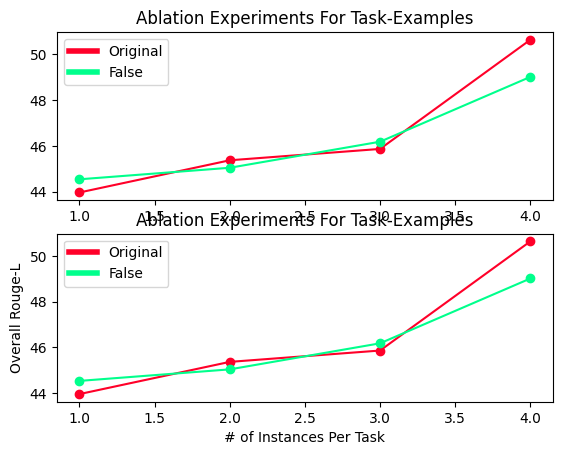

In [37]:
# For paper
# Total 2 graphs, with 2 sub-figures each

# -------------- Task Examples --------------
X = [1,2,3,4]
Y = [
    [43.9639, 45.3697, 45.8648, 50.6303],
    [44.5393, 45.0428, 46.18, 49.01],
]
Y_Name = [
    "Original",
    "False",
    # "Input-Only",
    # "Output-Only",
    # "Empty",
]
plot_two_line_graph_main_experiment(
    print_curve_X_list_1 = [X]*len(Y), 
    print_curve_Y_list_1 = Y, 
    print_curve_name_list_1 = Y_Name,
    Title_1="Ablation Experiments For Task-Examples", 
    XLabel_1="# of Instances Per Task", 
    YLabel_1="Overall Rouge-L", 
    X_MIN_MAX_1 = None, 
    Y_MIN_MAX_1 = None,
    print_curve_X_list_2 = [X]*len(Y), 
    print_curve_Y_list_2 = Y, 
    print_curve_name_list_2 = Y_Name,
    Title_2="Ablation Experiments For Task-Examples", 
    XLabel_2="", 
    YLabel_2="", 
    X_MIN_MAX_2 = None, 
    Y_MIN_MAX_2 = None
)






### Get scores difference between original and using negative label

In [4]:
get_metrics = ["predict_rougeL"]

model_list_original = [
    "My_tk_RobustPos_BS128_200_lr1e-4_large_def_pos",
    # "My_tk_BS128_200_lr1e-4_large_def_pos",
    # "My_tk_BS128_50_large_def_pos",
    # "My_tk_BS128_800_large_def_pos",
    "My_tk_BS128_large_def_pos",
    "My_tk_large_pos",
    # "My_tk_synth_cont_large_def_pos",
]
model_list_neg = ["NEG_AS_POS_" + model for model in model_list_original]
results, full_results = get_scores(get_metrics, model_list_original+ model_list_neg, return_full_results=True)

for model in model_list_original:
    print(f"{model} performance diff: {results[model]['predict_rougeL']} -- {results['NEG_AS_POS_' +model]['predict_rougeL']}")


My_tk_RobustPos_BS128_200_lr1e-4_large_def_pos performance diff: 49.2664 -- 48.9838
My_tk_BS128_200_lr1e-4_large_def_pos performance diff: 52.4474 -- 47.7424
My_tk_BS128_50_large_def_pos performance diff: 48.659 -- 42.7705
My_tk_BS128_800_large_def_pos performance diff: 54.2096 -- 50.0902
My_tk_BS128_large_def_pos performance diff: 52.72 -- 48.4073
My_tk_large_pos performance diff: 45.6417 -- 39.6398
My_tk_synth_cont_large_def_pos performance diff: 52.0403 -- 45.9409


### Get tasks which are highly depend to examples
- Those tasks which performance drop over 50% after changing positive examples to negative examples.
- For each model, we find such list.
- Finally we can find the intersection of these list and see how many tasks are highly related to input-label correlation.

My_tk_BS128_50_large_def_pos 27
My_tk_BS128_large_def_pos 21
My_tk_BS128_800_large_def_pos 20
Overlap AB: 16
Overlap ABC: 12
task036_qasc_topic_word_to_generate_related_fact
task1152_bard_analogical_reasoning_causation
task1154_bard_analogical_reasoning_travel
task1157_bard_analogical_reasoning_rooms_for_containers
task1158_bard_analogical_reasoning_manipulating_items
task1159_bard_analogical_reasoning_containers
task1342_amazon_us_reviews_title
task1664_winobias_text_generation
task190_snli_classification
task290_tellmewhy_question_answerability
task619_ohsumed_abstract_title_generation
task769_qed_summarization


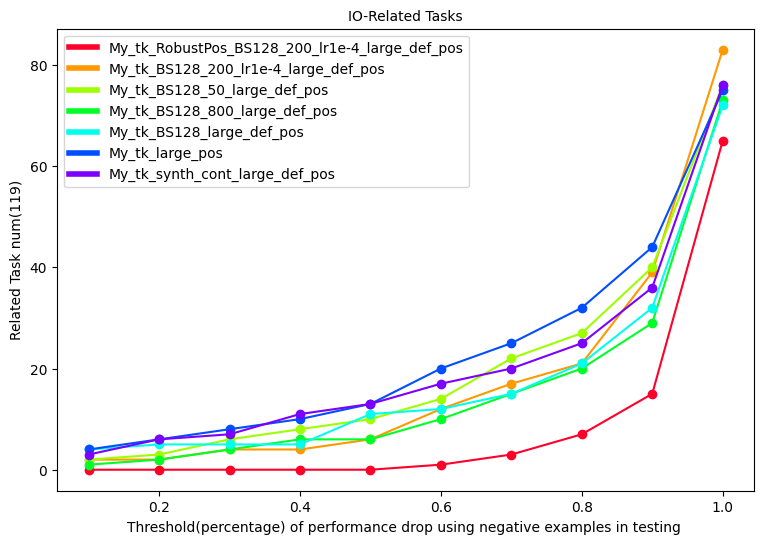

In [58]:
# Using full results from prev cell
task_diff_per_model = {}
for model_org, model_neg in zip(model_list_original, model_list_neg):
    task_diff_per_model[model_org] = []
    prefix = "predict_rougeL_for_"
    for task in test_task_list:
        org_result = full_results[model_org][prefix+task]
        neg_result = full_results[model_neg][prefix+task]
        task_diff_per_model[model_org].append(neg_result / org_result)
    task_diff_per_model[model_org] = np.array(task_diff_per_model[model_org])

thres_list = list(np.arange(0.1,1.1,0.1))
curve_name_list = model_list_original
X_list = [thres_list]*len(model_list_original)
Y_list = []
for model, task_diff in task_diff_per_model.items():
    Y=[np.sum(task_diff<thres) for thres in thres_list]
    Y_list.append(Y)

Thres = 0.8
Overlap_AB = np.logical_and(task_diff_per_model["My_tk_BS128_50_large_def_pos"]<Thres , task_diff_per_model["My_tk_BS128_large_def_pos"]<Thres)
Overlap_ABC = np.logical_and(Overlap_AB, task_diff_per_model["My_tk_BS128_800_large_def_pos"]<Thres)

print("My_tk_BS128_50_large_def_pos", np.sum(task_diff_per_model["My_tk_BS128_50_large_def_pos"]<Thres))
print("My_tk_BS128_large_def_pos", np.sum(task_diff_per_model["My_tk_BS128_large_def_pos"]<Thres))
print("My_tk_BS128_800_large_def_pos", np.sum(task_diff_per_model["My_tk_BS128_800_large_def_pos"]<Thres))
print(f"Overlap AB: {np.sum(Overlap_AB)}")
print(f"Overlap ABC: {np.sum(Overlap_ABC)}")

Overlap_task_name = []
for i, IS_NO_RELATED in enumerate(Overlap_ABC):
    if IS_NO_RELATED:
        Overlap_task_name.append(test_task_list[i])
Overlap_task_name.sort()
for task_name in Overlap_task_name:
    print(task_name)

plot_line_graph(X_list, Y_list, curve_name_list, Title="IO-Related Tasks", XLabel="Threshold(percentage) of performance drop using negative examples in testing ", YLabel="Related Task num(119)")

### Check format correctness
#### How do we define format correctness
* Exact --> For those tasks with less than 10 labels, check if all predicted output is in the label space

In [29]:
from rouge_score import rouge_scorer
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
def check_format_correctness_generative(model_name, task_list, meta_data, model_task_prediction, rougeL_thres=0.5, task_success_thres = 0.9):
    task_prediction = model_task_prediction[model_name]
    instance_success =0 #RougeL > rougeL_thres
    instance_all = 0
    
    #task
    task_success = 0
    task_failed = 0
    task_all = 0
    for task in task_list:
        if meta_data[task+".json"]['DefHasLabel']=="NoMentioned":
            task_all += 1
            task_instance_success = 0
            for instance ,prediction in zip(task_prediction[task]['Instances'], task_prediction[task]['Predictions']):
                rougeL_for_intance = []
                for output in instance['output']:
                    scores = scorer.score(prediction=prediction, target=output)
                    rougeL_for_intance.append(scores["rougeL"].fmeasure)
                rougeL_score = max(rougeL_for_intance)
                if rougeL_score > rougeL_thres:
                    instance_success+=1
                    task_instance_success+=1
                instance_all += 1
            if task_instance_success >= 100*task_success_thres:
                task_success+=1
                # print(task)
                # print(meta_data[task+".json"]['Definition'])
            if task_instance_success <= 100*(1-task_success_thres):
                task_failed+=1
                print("---------------")
                print(task)
                print(meta_data[task+".json"]['Definition'])
                print(meta_data[task+".json"]['Positive Examples'][0]['output'])
                print(instance['output'][0])
                print("#")
                print(prediction)
        # break
    print(f"---------{model_name}----------")
    print(f"Task Success: {task_success}/{task_all}, {task_success/task_all*100}%")
    print(f"Instance Success: {instance_success}/{instance_all}, {instance_success/instance_all*100}%")
    print(f"Task Failed: {task_failed}/{task_all}, {task_failed/task_all*100}%")
    # print(f"Exact Instance Correct: {instance_correct}/{instance_all}, {instance_correct/instance_all*100}%")
    
    

model_list = [
    "My_tk_BS128_200_lr1e-4_large_def_pos",
]

model_task_predictions= get_prediction_results(model_list)
check_format_correctness_generative(model_list[0], test_task_list, meta_data, model_task_predictions)

---------------
task1356_xlsum_title_generation
['Generate an appropriate title for the given text. The generated title must be short and include the main topic of the text. The preferred titles are under fifteen words.']
NHS Wales: Court action if trade deals affect service?
Leicester explosion: Trio 'wanted £300k insurance payout'
#
A man accused of causing a "massive" explosion in a Polish supermarket has been cleared of murder.
---------------
task1161_coda19_title_generation
["In this task, you're given a paragraph from the research paper and your task is to generate a suitable title for the research paper based on the given paper. Under 100 words is a good title length."]
Development and evaluation of an efficient 3 -noncoding region-based SARS coronavirus (SARS-CoV) RT-PCR assay for detection of SARS-CoV
Characterizing Influenza surveillance systems performance: application of a Bayesian hierarchical statistical model to Hong Kong surveillance data
#
Influenza surveillance syste

In [2]:

def check_format_correctness(model_name, task_list, meta_data, model_task_prediction):
    task_prediction = model_task_prediction[model_name]
    exact_correct_num = 0
    cal_task_num = 0
    format_correct =0
    instance_correct =0
    instance_all = 0
    task_success =0
    for task in task_list:
        label_space = meta_data[(task+".json").replace("_dev.json", ".json")]["LabelSpace"]
        task_instance_correct = 0
        task_instance_num=0
        if meta_data[task+".json"]['DefHasLabel']=="ExactMentioned":
            cal_task_num += 1
            EXACT_CORRECT = True
            # print(len(task_prediction[task]['Instances']))
            # print(len(task_prediction[task]['Predictions']))
            for instance ,prediction in zip(task_prediction[task]['Instances'], task_prediction[task]['Predictions']):
                for output in instance['output']:
                    if output.strip() == prediction.strip():
                        task_instance_correct += 1
                        instance_correct+=1
                        break
                    # else:
                        # print(output.strip(), prediction.strip())
                if prediction not in label_space:
                    # print(label_space, prediction)
                    EXACT_CORRECT = False
                else:
                    format_correct += 1
                instance_all += 1
                task_instance_num+=1
            if EXACT_CORRECT:
                exact_correct_num+=1
            # else:
                # print(task)
                # print(meta_data[task+".json"]['Definition'])
            if (task_instance_correct/task_instance_num) > (1.5/len(label_space)):
                task_success+=1
    print(f"---------{model_name}----------")
    # print(f"Task Success: {task_success}/{cal_task_num}, {task_success/cal_task_num*100}%")
    print(f"Format Exact Instance Correct: {format_correct}/{instance_all}, {format_correct/instance_all*100}%")
    print(f"Exact Instance Correct: {instance_correct}/{instance_all}, {instance_correct/instance_all*100}%")
    # print(f"Format Exact Task Correct: {exact_correct_num}/{cal_task_num}, {exact_correct_num/cal_task_num*100}%")
    
def check_format_correctness_random_guessing(task_list, meta_data):
    instance_correct = 0
    instance_all = 0
    for task in task_list:
        label_space = meta_data[(task+".json").replace("_dev.json", ".json")]["LabelSpace"]
        if meta_data[task+".json"]['DefHasLabel']=="ExactMentioned":
            instance_correct += 100//len(label_space)
            instance_all += 100
    print(f"---------Random Guessing----------")
    print(f"Exact Instance Correct: {instance_correct}/{instance_all}, {instance_correct/instance_all*100}%")

def check_format_correctness_random_guessing_most_frequent(task_list, meta_data, task_prediction):
    instance_correct = 0
    instance_all = 0
    for task in task_list:
        label_space = meta_data[(task+".json").replace("_dev.json", ".json")]["LabelSpace"]
        if meta_data[task+".json"]['DefHasLabel']=="ExactMentioned":
            label_cnt = {label:0 for label in label_space}
            for instance in task_prediction[task]['Instances']:
                ground_truth = instance['output'][0]
                label_cnt[ground_truth] +=1
            instance_correct += max(label_cnt.values())
            # print(max(label_cnt.values()), 100//len(label_space))
            instance_all += 100
    print(f"---------Random Guessing Most Frequent----------")
    print(f"Exact Instance Correct: {instance_correct}/{instance_all}, {instance_correct/instance_all*100}%")
    


In [4]:
model_list = [
    # "t5-large-predict",
    # "Main23_tk_BS128_10_lr1e-4_large_def_pos2",
    # "Main23_tk_BS128_20_lr1e-4_large_def_pos2",
    # "Main23_tk_BS128_50_lr1e-4_large_def_pos2",
    # "Main23_tk_BS128_200_lr1e-4_large_def_pos2",
    # "Main_tk_BS128_10_lr1e-4_large_def_pos2",
    # "Main_tk_BS128_20_lr1e-4_large_def_pos2",
    # "Main_tk_BS128_50_lr1e-4_large_def_pos2",
    # "My_tk_BS128_200_lr1e-4_large_def_pos",
    # "Main23_tk_BS128_10_lr1e-4_large_def_pos2",
    # "Main23_tk_BS128_20_lr1e-4_large_def_pos2",
    # "Main23_tk_BS128_50_lr1e-4_large_def_pos2",
    # "Main23_tk_BS128_10_lr1e-4_large_def_pos2",
    # "Main42_tk_BS128_800_lr1e-4_large_label_pos2",
    # "My_tk_synth_cont_large_def_pos",
    "My_tk_BS128_200_lr1e-4_large_def_pos",
    "Pred_tk_11b_def_pos2"
    
]

model_task_predictions= get_prediction_results(model_list)

check_format_correctness_random_guessing( test_task_list, meta_data)
check_format_correctness_random_guessing_most_frequent( test_task_list, meta_data, model_task_predictions[model_list[0]])

for model_name in model_list:
    check_format_correctness(model_name, test_task_list, meta_data, model_task_predictions)
# check_format_correctness(test_task_list, meta_data, model_task_predictions["My_tk_BS128_large_def_pos"], label_space_size_less_than = 10)
# check_format_correctness(test_task_list, meta_data, model_task_predictions["RAND_POS_SEED10_My_tk_BS128_large_def_pos"], label_space_size_less_than = 10)
# check_format_correctness(test_task_list, meta_data, model_task_predictions["RAND_POS_SEED20_My_tk_BS128_large_def_pos"], label_space_size_less_than = 10)
# check_format_correctness([task+"_dev" for task in train_task_list], meta_data, model_task_predictions["RAND_POS_SEED20_My_tk_BS128_large_def_pos"], label_space_size_less_than = 10)

task190_snli_classification
---------Random Guessing----------
Exact Instance Correct: 2431/5700, 42.64912280701754%
---------Random Guessing Most Frequent----------
Exact Instance Correct: 2472/5700, 43.368421052631575%
---------My_tk_BS128_200_lr1e-4_large_def_pos----------
Format Exact Instance Correct: 5700/5700, 100.0%
Exact Instance Correct: 3297/5700, 57.8421052631579%
---------Pred_tk_11b_def_pos2----------
Format Exact Instance Correct: 5020/5700, 88.0701754385965%
Exact Instance Correct: 3389/5700, 59.4561403508772%


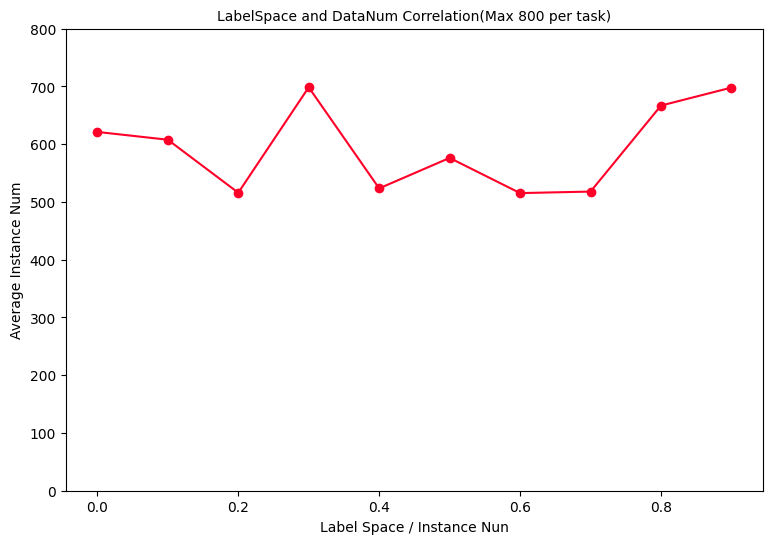

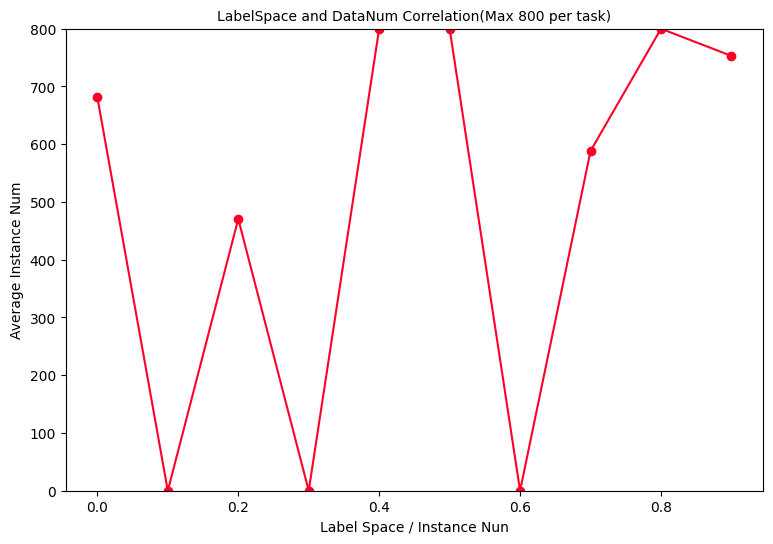

In [28]:
def plot_LabelSpace_DataNum_correlation(meta_data, task_list, step = 0.1):
    x_len = len(list(np.arange(0,1,step)))
    task_num_per_thres = [0]*x_len
    task_total_instance_num_per_thres = [0]*x_len
    for i, thres in enumerate(np.arange(0,1,step)):
        for task in task_list:
            task_key = task + ".json"
            label_space = len(meta_data[task_key]["LabelSpace"])
            instance_num = meta_data[task_key]["InstanceNum"]
            if label_space >= thres * instance_num and label_space < (thres+step) * instance_num:
                task_num_per_thres[i]+=1
                task_total_instance_num_per_thres[i] += min(instance_num, 800)
    average_instance_num_by_thres = [total_instances / max(task_num, 1) for task_num, total_instances in zip(task_num_per_thres, task_total_instance_num_per_thres)]
    plot_line_graph([list(np.arange(0,1,step))], [average_instance_num_by_thres], None, Title="LabelSpace and DataNum Correlation(Max 800 per task)", XLabel="Label Space / Instance Nun", YLabel="Average Instance Num", Y_MIN_MAX=[0,800])

plot_LabelSpace_DataNum_correlation(meta_data, train_task_list)
plot_LabelSpace_DataNum_correlation(meta_data, test_task_list, step=0.2)

### Plot performance difference between two models using hist. Can apply some color mask.

In [11]:
def compare_and_sort_by_performances(APerf, BPerf):
    PerfDiff={}
    for key in APerf.keys():
        PerfDiff[key.replace("predict_rougeL_for_", "")] = APerf[key]-BPerf[key]
    SortedPerfDiff = {k: v for k, v in sorted(PerfDiff.items(), key=lambda item: item[1])} #small to big
    return SortedPerfDiff

def plot_performance_diff(TwoModels, test_task_list, meta_data, compare_metrics = None, MaskConfig = 0):
    if compare_metrics is None:
        compare_metrics = []
        # Use all test task
        for task in test_task_list:
            compare_metrics.append(f"predict_rougeL_for_{task}")
    
    TwoScores = get_scores(compare_metrics, TwoModels)
    SortedPerfDiff = compare_and_sort_by_performances(TwoScores[TwoModels[0]], TwoScores[TwoModels[1]])
    TaskNameList = []
    PerfDiffList = []
    for task, perf_diff in SortedPerfDiff.items():
        TaskNameList.append(task)
        PerfDiffList.append(perf_diff)
    if MaskConfig == 0:
        # Default
        MaskList = None
        MaskNameList = None
        ColorList = [(0, 0.7, 0.1, 0.5)]
    elif MaskConfig == 1:
        # HasLabel in Def
        MaskList = []
        MaskNameList = ["NoMentioned", "HasLabel"]
        ColorList = [
            (1, 0, 0, 0.5),
            (0, 0.7, 0.1, 0.5)
        ]
        for task in TaskNameList:
            task_key = task + ".json"
            DefHasLabel = meta_data[task_key]['DefHasLabel']
            if DefHasLabel == "NoMentioned":
                MaskList.append(0)
            else:
                MaskList.append(1)
    # MaskList = [ np.array(mask)==True for mask in MaskList]
    plot_horizontal_hist(
        TaskNameList, 
        PerfDiffList,
        MaskList = MaskList,
        MaskNameList = MaskNameList,
        ColorList = ColorList,
        Title=f"Performance Difference Between {TwoModels[0]} -- {TwoModels[1]}", 
        XLabel="Performance Difference (RougeL)", 
        YLabel="Task Name"
    )

In [ ]:
# Performance Differnece and DefHasLabel
TwoModels = [
    "My_tk_BS128_200_lr1e-4_large_def_pos",
    "My_tk_BS128_200_lr1e-4_large_pos"
]

plot_performance_diff(TwoModels, test_task_list, meta_data, MaskConfig=1)

In [4]:
# Performance Differnece and NegAsPos
TwoModels = [
    "My_tk_BS128_50_lr1e-4_large_def_pos1",
    "My_tk_NegAsPos_BS128_50_lr1e-4_large_def_pos1",
]

plot_performance_diff(TwoModels, test_task_list, meta_data, MaskConfig=0)

NameError: name 'plot_performance_diff' is not defined

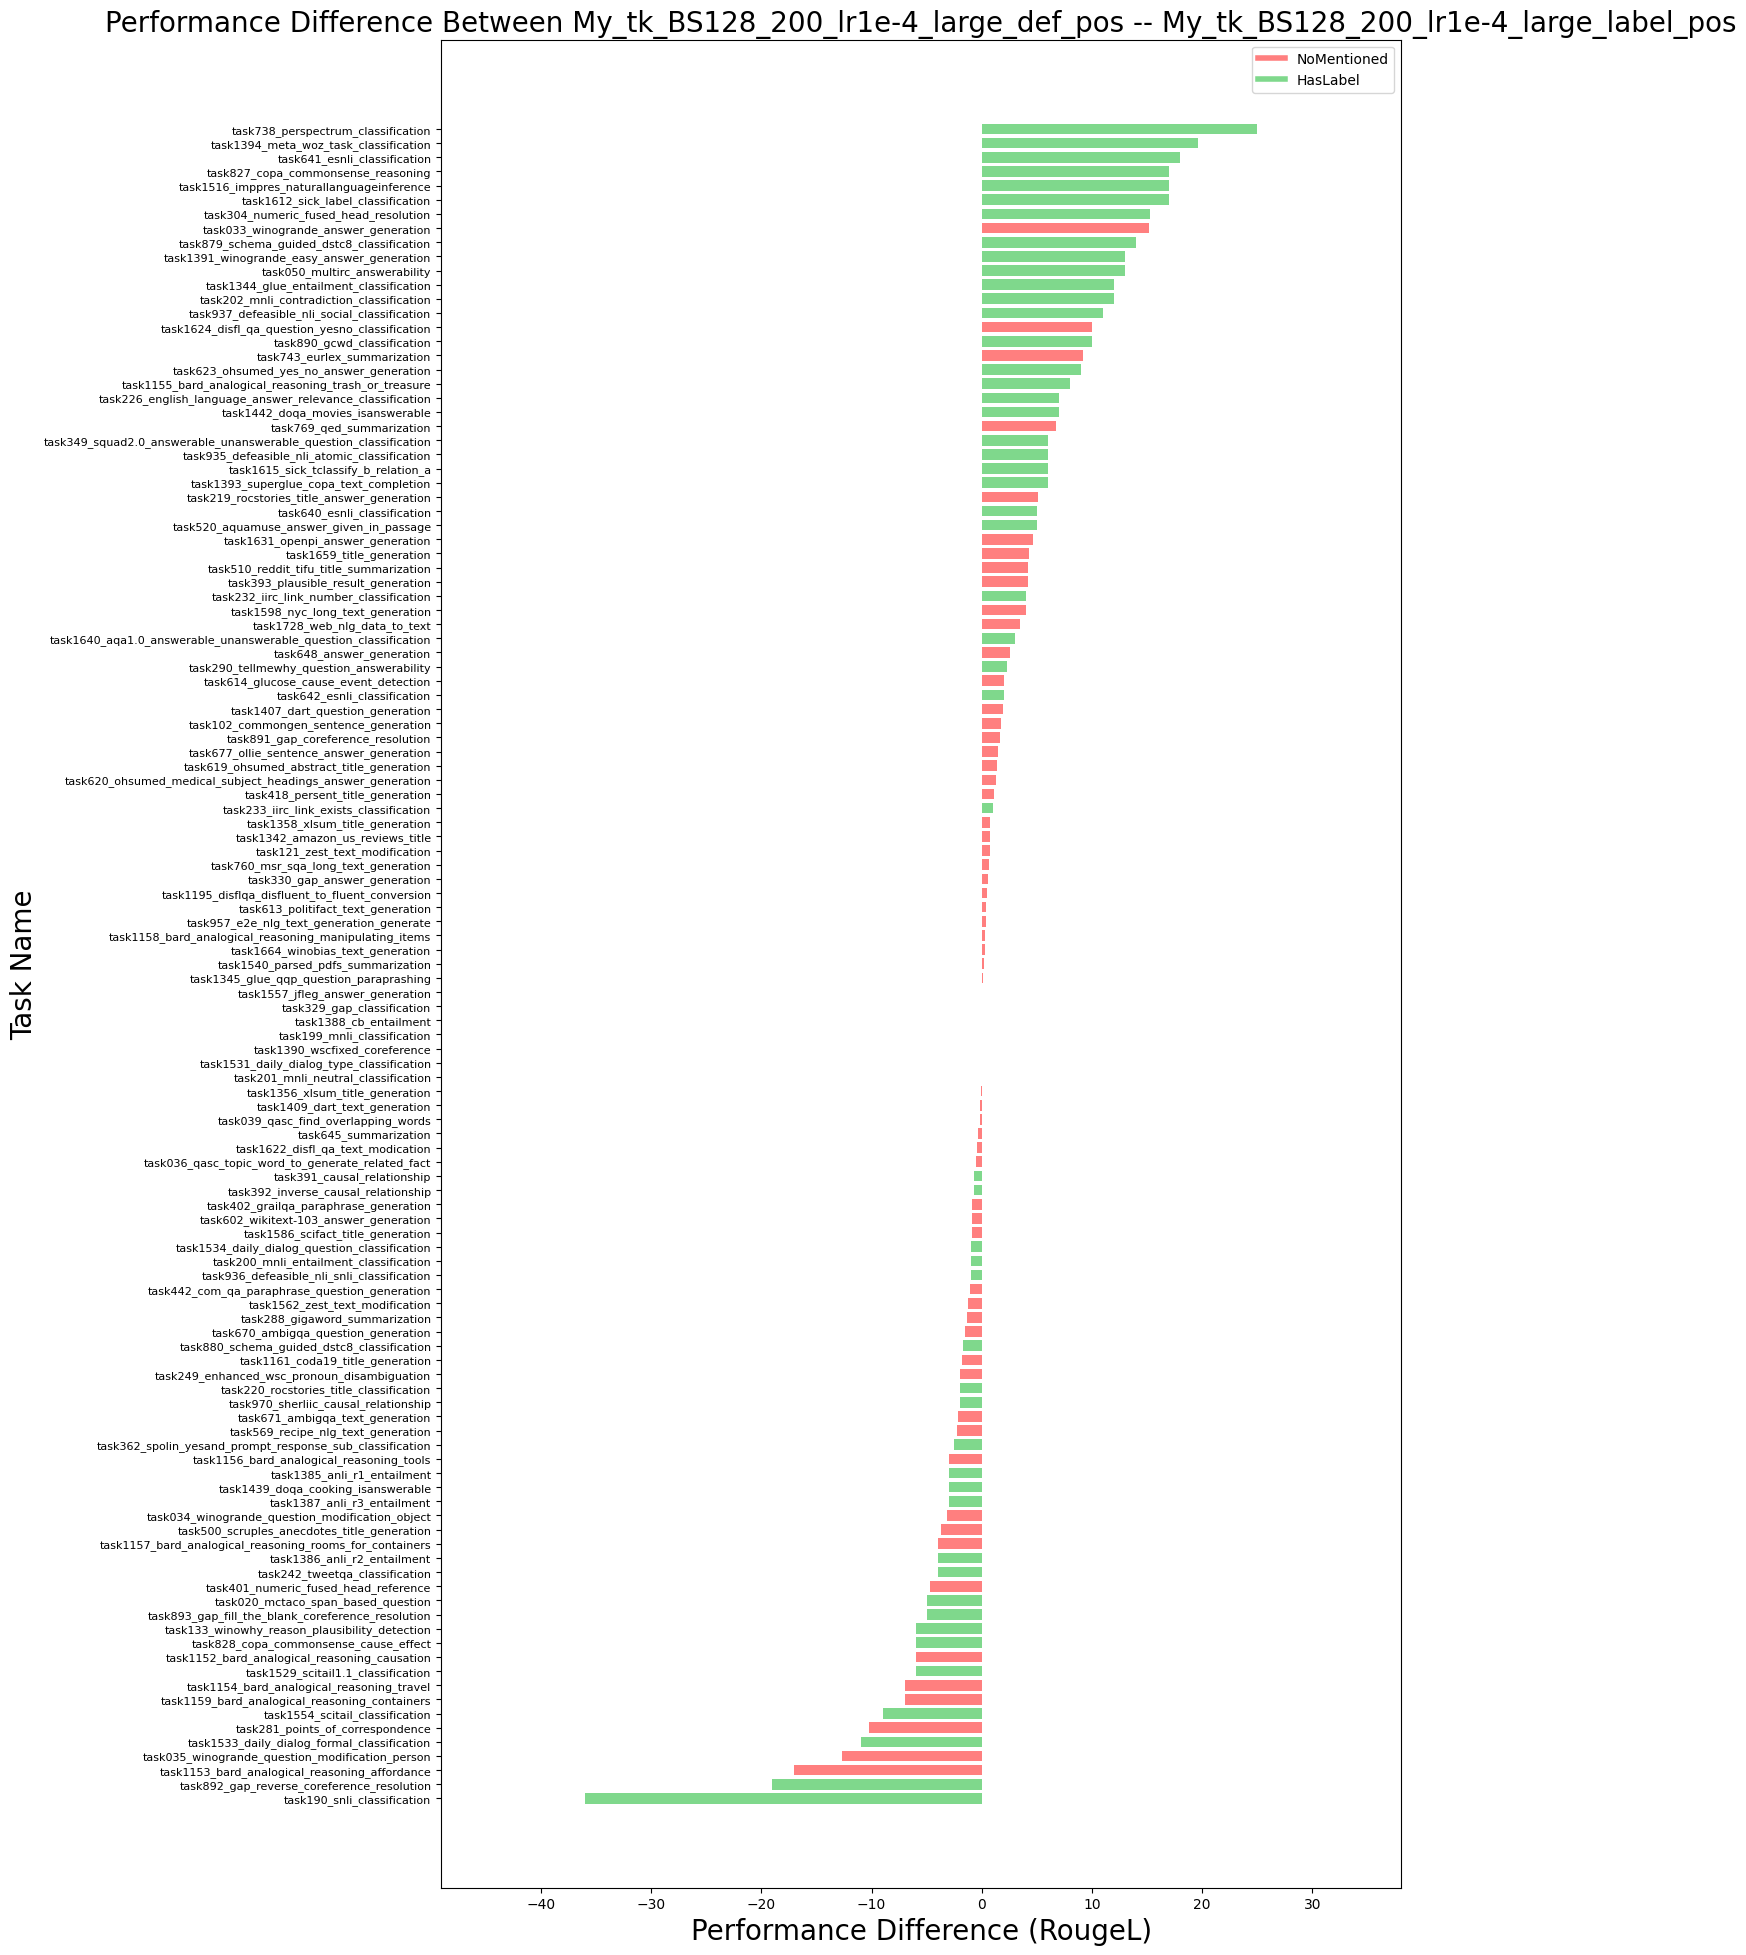

In [12]:
# Performance Differnece and NegAsPos
TwoModels = [
    "My_tk_BS128_200_lr1e-4_large_def_pos",
    "My_tk_BS128_200_lr1e-4_large_label_pos",
]

plot_performance_diff(TwoModels, test_task_list, meta_data, MaskConfig=1)

### Check TS_suff_dir to see whether training on single tasks may lead to better testing performance
#### We use an upper-bound here. We select the highest testing score from all models training on each training tasks

In [44]:
import tqdm
import random
model_list = train_task_list
get_metrics = ["predict_rougeL_for_" + task for task in test_task_list]
scores_dict = get_scores(get_metrics, model_list, output_dir="output/my_experiment/TS_suff_dir/")

# ------- Sim file
sim_file = "../SimilarityMetrics/output/T5_DEF_POS2_COS_logits.json"
test2train_sim_rank_desc = json.load(open(sim_file, "r"))["test2train_sim_ranking_desc"]
def get_ts_suff_score(test2train_sim_rank_desc = None):
    test_scores = []
    test_cls_scores = []
    test_gen_scores = []
    for idx, test_task in tqdm.tqdm(enumerate(test_task_list)):
        task_key = test_task+".json"
        score_metric = "predict_rougeL_for_" + test_task
        scores = []
        for model in model_list:
            scores.append(scores_dict[model][score_metric])
        if test2train_sim_rank_desc is not None:
            most_sim_task_name = test2train_sim_rank_desc[test_task][0]
            most_sim_task_index = train_task_list.index(most_sim_task_name)
            # most_sim_task_index = random.randint(0, len(scores)-1)
            max_score = scores[most_sim_task_index]
        else:
            max_score = max(scores)
        test_scores.append(max_score)
        if meta_data[task_key]['DefHasLabel']=="NoMentioned":
            test_gen_scores.append(max_score)
        else:
            test_cls_scores.append(max_score)
    print(sum(test_scores)/len(test_scores))
    print(sum(test_gen_scores)/len(test_gen_scores))
    print(sum(test_cls_scores)/len(test_cls_scores))

get_ts_suff_score(test2train_sim_rank_desc)


119it [00:00, 6149.78it/s]

20.01529411764705
13.958852459016397
26.385


In [45]:
for test_task in test_task_list:
    print(f"------------- {test_task} -------------")
    print(test2train_sim_rank_desc[test_task][:3])
    

------------- task1356_xlsum_title_generation -------------


TypeError: unhashable type: 'list'

In [2]:
have_tasks = []
all_scores = {
    "all":[],
    "cls":[],
    "gen":[],
}
all_old_scores = {
    "all":[],
    "cls":[],
    "gen":[],
}
better = 0
worser = 0
neutral = 0
cls_gen = []
for task in test_task_list:
    model_list = [task]
    get_metrics = [f"predict_rougeL_for_{task}"]
    try:
        score = get_scores(get_metrics, model_list, output_dir="output/my_experiment/MTL_SIM_TK_42_10_1000")[model_list[0]][get_metrics[0]]
        all_scores['all'].append(score)
        old_score = get_scores(get_metrics, ["Main23_tk_BS128_200_lr1e-4_large_def_pos2"])["Main23_tk_BS128_200_lr1e-4_large_def_pos2"][get_metrics[0]]
        all_old_scores['all'].append(old_score)
        have_tasks.append(task)
        if score == old_score:
            neutral+=1
        elif score > old_score:
            better+=1
        else:
            worser+=1
        # print(score, old_score)
        if meta_data[task+".json"]['DefHasLabel'] == "NoMentioned":
            # print("B", meta_data[task+".json"]['DefHasLabel'])
            all_scores['cls'].append(score)
            all_old_scores['cls'].append(old_score)
        else:
            # print("A", meta_data[task+".json"]['DefHasLabel'])
            all_scores['gen'].append(score)
            all_old_scores['gen'].append(old_score)
    except:
        pass
print(sum(all_scores['all'])/len(all_scores['all']))
print(sum(all_scores['cls'])/len(all_scores['cls']))
print(sum(all_scores['gen'])/len(all_scores['gen']))

print(sum(all_old_scores['all'])/len(all_old_scores['all']))
print(sum(all_old_scores['cls'])/len(all_old_scores['cls']))
print(sum(all_old_scores['gen'])/len(all_old_scores['gen']))


print(better, worser, neutral)

SyntaxError: invalid syntax (859261834.py, line 30)